# MILESTONE 1: Data Collection, Data Preprocessing and AWS Integration

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Raw_Dataset_for_Online_Payment.csv to Raw_Dataset_for_Online_Payment (1).csv


## Loading Dataset

In [4]:
data=pd.read_csv('Raw_Dataset_for_Online_Payment.csv')

## Exploratory Data Analysis

In [5]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,397,CASH_IN,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,0,0
1,251,PAYMENT,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,0,0
2,3,TRANSFER,22877.00,C1247938090,22877.00,0.00,C1002031672,0.00,0.00,1,0
3,635,TRANSFER,182739.36,C1687063682,182739.36,0.00,C451391923,0.00,0.00,1,0
4,157,CASH_OUT,4738282.28,C751624512,4738282.28,0.00,C320991755,0.00,4738282.28,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,382,CASH_OUT,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,0,0
16422,40,CASH_IN,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,0,0
16423,132,TRANSFER,768520.15,C1484143293,768520.15,0.00,C1982144545,0.00,0.00,1,0
16424,274,TRANSFER,379057.93,C1259154516,379057.93,0.00,C605861761,0.00,0.00,1,0


### Get information about the variables in the dataset

In [6]:
data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,16426,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426.000000,16426.000000
unique,NaN,5,NaN,16426,NaN,NaN,16235,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C2033626434,NaN,NaN,C1875540277,NaN,NaN,NaN,NaN
freq,NaN,7066,NaN,1,NaN,NaN,3,NaN,NaN,NaN,NaN
mean,306.441556,NaN,8.248655e+05,NaN,1.242838e+06,5.257872e+05,NaN,8.311948e+05,1.260807e+06,0.500000,0.000974
std,193.321590,NaN,1.862573e+06,NaN,3.252860e+06,2.505016e+06,NaN,3.484266e+06,3.864760e+06,0.500015,0.031196
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,NaN,3.815791e+04,NaN,1.035827e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,NaN,1.752676e+05,NaN,1.212709e+05,0.000000e+00,NaN,0.000000e+00,1.297782e+05,0.500000,0.000000
75%,410.000000,NaN,5.404362e+05,NaN,7.979333e+05,0.000000e+00,NaN,5.283537e+05,1.091986e+06,1.000000,0.000000


### Statistical Summary of Dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


## Handle missing data by imputation or removal

In [8]:
if data.isnull().values.any():
    print('There are some missing values in this dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape)
else:
    print('GREAT, There is no missing values in this dataset')
    print(data.isnull().sum())


GREAT, There is no missing values in this dataset
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## Visual representation of types of transactions

In [9]:
col_type = data['type'].value_counts().to_frame()
print(col_type)


          count
type           
CASH_OUT   7066
TRANSFER   4750
PAYMENT    2735
CASH_IN    1825
DEBIT        50


Text(0, 0.5, 'count of online transaction type ')

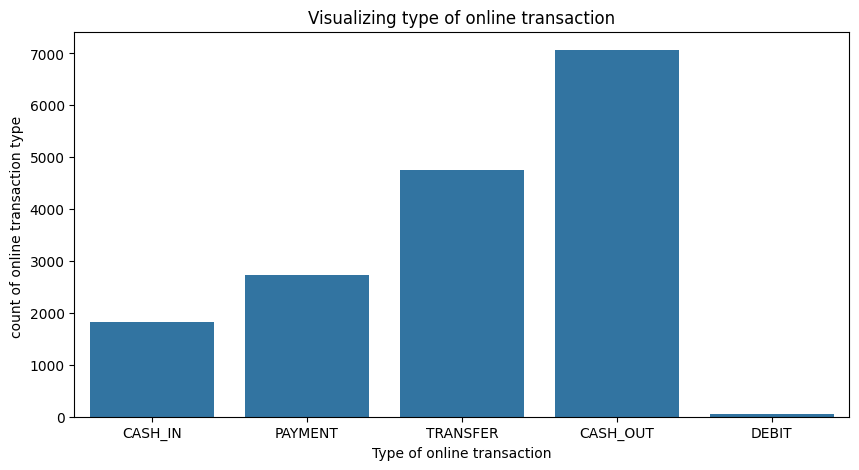

In [10]:
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

Cash_Out, Payment and Cash_in appears to be the most frequently used medium of online transactions
### Total Number of Frauds Committed


In [11]:
pmt_fraud = data.isFraud[data['isFraud']=='Fraud'].count()
print (f'Total Number of Frauds Committed is {pmt_fraud}')

Total Number of Frauds Committed is 0


In [12]:
# Ascertain the payment type of frauds committed and the number of fraud by online payment type

# Value of Frauds Committed
fraud_total = data[data['isFraud']=='Fraud'].groupby(['type'])['amount'].sum().round(decimals=-1).to_frame()
fraud_total['amount'] = fraud_total['amount']/1000
fraud_total.rename(columns={'amount':'amount_in_thousands'},inplace=True)

# Fraud Count
fraud_count =data[data['isFraud']=='Fraud'].groupby(['type'])['isFraud'].count().to_frame()
fraud_count.rename(columns={'isFraud':'fraud_count'}, inplace=True)


#Merge both tables above
frauds = pd.merge(fraud_count,fraud_total,on='type')
frauds['avg_fraud'] = (frauds['amount_in_thousands']/frauds['fraud_count']).round(decimals=2)


The fraud cases were between CASH_OUT and TRANSFER payment methods. This indicates that despite transfers being less frequently used than Cash_out, it has the most value of transactions and frauds

### Fraud Dataset: Create a dataset for all fraud cases


In [13]:
fraud_data = data[data['isFraud']=='Fraud']
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### Largest Fraud Amount


In [14]:
# Largest Fraud Amount

largest_fraud = fraud_data.amount.max()
print (f'The largest fraudulent payment is {largest_fraud}')
print()

# Displays row with the largest fraud amount
fraud_data.sort_values(by='amount',ascending=False).head(1)

The largest fraudulent payment is nan



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### Correlation heatmap showing relationships between the variables in the fraud data


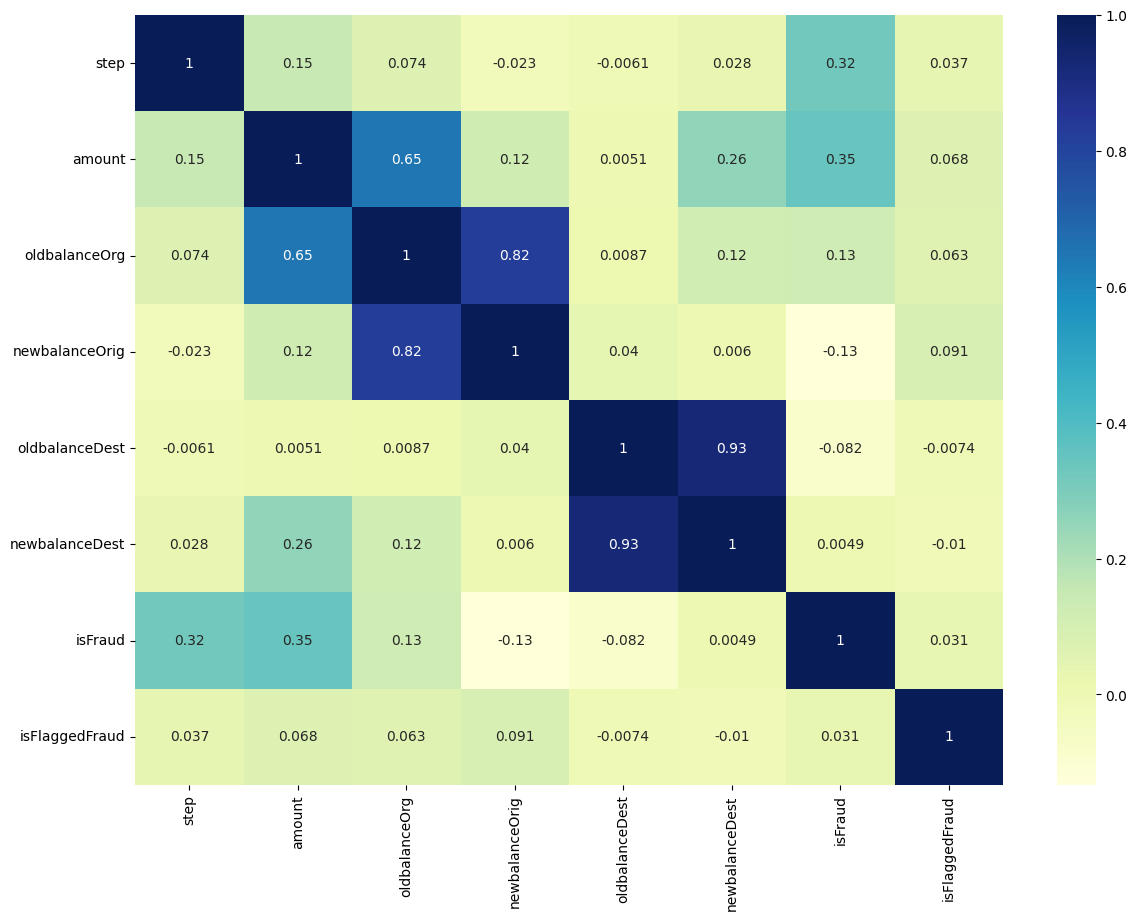

In [15]:
numeric_data = data.select_dtypes(include=['number'])

# Plotting the heatmap with numeric data only
fig, ax = plt.subplots(figsize=(14, 10))
fraud_data = sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Deleting unnecessary Columns

In [16]:
def drop_unnecessary_columns(dataframe, columns):
    dataframe.drop(columns=columns, inplace=True)
    print("Dropped unnecessary columns: ", columns)

columns_to_drop = ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
drop_unnecessary_columns(data, columns_to_drop)

Dropped unnecessary columns:  ['step', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


### Checking if the Dataset is Balanced

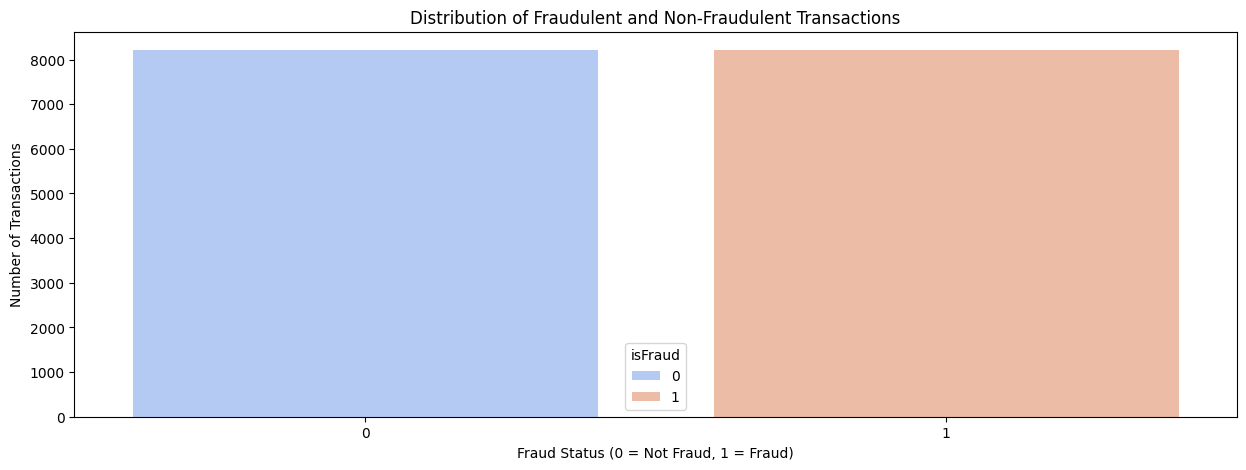


Transaction Summary:
 isFraud
0    8213
1    8213
Name: count, dtype: int64


In [17]:
def evaluate_transaction_balance(df):
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x='isFraud', hue='isFraud', palette='coolwarm')  # Changed palette for variety
    plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
    plt.xlabel('Fraud Status (0 = Not Fraud, 1 = Fraud)')
    plt.ylabel('Number of Transactions')
    plt.show()

    transaction_summary = df['isFraud'].value_counts()
    print("\nTransaction Summary:\n", transaction_summary)
    if transaction_summary.min() / transaction_summary.max() < 0.1:
        print("Alert: The dataset appears to be imbalanced. Consider using resampling methods.")

# Call the function with your dataframe
evaluate_transaction_balance(data)

### Convert Categorical Features to Numerical Representations

In [18]:
from sklearn.preprocessing import LabelEncoder  # Add this import

# Identify categorical columns in the dataset
categorical_features = data.select_dtypes(include=['object']).columns
encoders = {}

# Convert categorical features to numerical values using label encoding
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    encoders[feature] = encoder

print("Changed to numeric")

# Update 'isFraud' column with descriptive categorical labels
data["Fraud_Status"] = data["isFraud"].map({
    0: "No Fraud",
    1: "Fraud"
})
print("The 'Fraud_Status' is labeled.")

Changed to numeric
The 'Fraud_Status' is labeled.


### Normalize Numerical Features

In [19]:
def scale_numeric_features(df, scaling_technique='minmax'):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Choose the scaling technique based on the provided argument
    if scaling_technique.lower() == 'minmax':
        scaler = MinMaxScaler()
    elif scaling_technique.lower() == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaling technique. Choose 'minmax' or 'standard'.")

    # Apply the selected scaling method to the numeric columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print(f"Numeric features scaled using {scaling_technique.capitalize()} scaling.")
    return df

# Normalize the data using min-max scaling
data = scale_numeric_features(data, scaling_technique='minmax')

Numeric features scaled using Minmax scaling.


In [20]:
data.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,Fraud_Status
0,0.00,0.002432,0.018398,0.023652,0.0,No Fraud
1,0.75,0.000401,0.005692,0.006586,0.0,No Fraud
2,1.00,0.000727,0.000384,0.000000,1.0,Fraud
3,1.00,0.005805,0.003067,0.000000,1.0,Fraud
4,0.25,0.150521,0.079521,0.000000,1.0,Fraud
5,0.25,0.317671,0.167827,0.000000,1.0,Fraud
6,1.00,0.013307,0.004891,0.000000,0.0,No Fraud
7,0.25,0.002433,0.001285,0.000000,1.0,Fraud
8,0.25,0.000797,0.000017,0.000000,0.0,No Fraud
9,0.75,0.000534,0.002359,0.002495,0.0,No Fraud


### Save Final Preprocessed Dataset

In [21]:
final_dataset_path = "Final_cleaned_preprocessed_DataSet.csv"
data.to_csv(final_dataset_path, index=False)
print("Final preprocessed dataset saved to: ", final_dataset_path)

Final preprocessed dataset saved to:  Final_cleaned_preprocessed_DataSet.csv
